In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import random
import itertools
import simpy

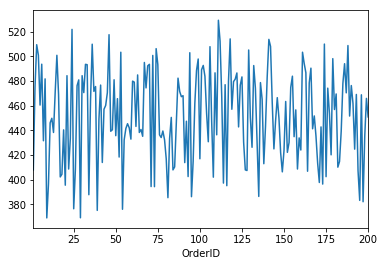

In [53]:
env = simpy.Environment()

log = []
def writeLog(t,orderID,stage,op):
    log.append([t,orderID,stage,op])

def order_generator(env,reactor_queue):
    orderID = 1
    while orderID <= 200:
        yield env.timeout(random.uniform(115-30,115+30))
        yield reactor_queue.put(orderID)
        writeLog(round(env.now,1), orderID, 'Stage 0', 'Queue')
        orderID += 1
        
reactor_queue = simpy.Store(env)

def batch_reactor(env, name, reactor_queue):
    while True:
        orderID = yield reactor_queue.get()
        writeLog(round(env.now,1), orderID, 'Stage 1', 'Reactor '+name)
        yield env.timeout(random.uniform(335-60,335+60))
        writeLog(round(env.now,1), orderID, 'Stage 2', 'Reactor '+name)
        yield storage_queue.put(orderID)
        writeLog(round(env.now,1), orderID, 'Stage 3', 'Reactor '+name)
        
storage_queue = simpy.Store(env,2)

def batch_still(env, storage_queue,name):
    while True:
        orderID = yield storage_queue.get()
        writeLog(round(env.now,1), orderID, 'Stage 4', 'Still'+name)
        yield env.timeout(random.uniform(110-25,110+25))
        writeLog(round(env.now,1), orderID, 'Stage 5', 'Still'+name)
        
env.process(order_generator(env,reactor_queue))
env.process(batch_reactor(env,"A",reactor_queue))
env.process(batch_reactor(env,"B",reactor_queue))
env.process(batch_reactor(env,"C",reactor_queue))
env.process(batch_reactor(env,"D",reactor_queue))
env.process(batch_still(env,storage_queue,"S1"))
env.process(batch_still(env,storage_queue,"S2"))

env.run()

df = pd.DataFrame(log,columns=['Time','OrderID','Stage','Equip'])
df = df.pivot(index='OrderID',columns='Stage',values='Time')
df.head()

ptime = df['Stage 5']-df['Stage 0']

ptime.plot()

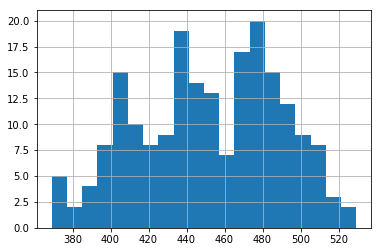

In [54]:
ptime.hist(bins=20)

In [55]:
ptime.mean()

451.8489999999998